In [1]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from kneed import KneeLocator

# data modeling
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage,cut_tree
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA



import warnings
warnings.simplefilter("ignore")  

In [2]:
data = pd.read_csv (r'C:\Users\iran\Desktop\dataset.exel\Country-data.csv')
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [3]:
df = pd.DataFrame(data)
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.dropna()

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:>

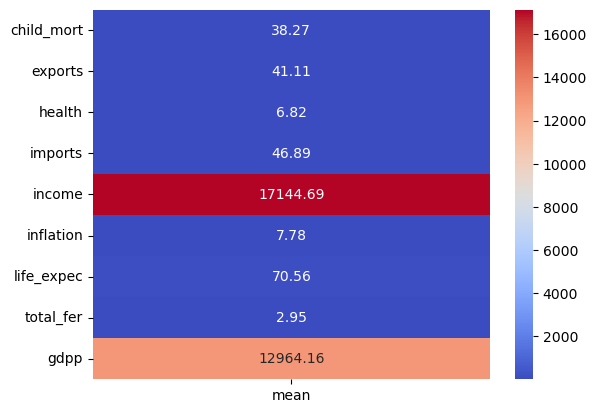

In [9]:
sns.heatmap (df.describe ().T [['mean']], annot = True, cmap = 'coolwarm', fmt = ".2f")

In [10]:
columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

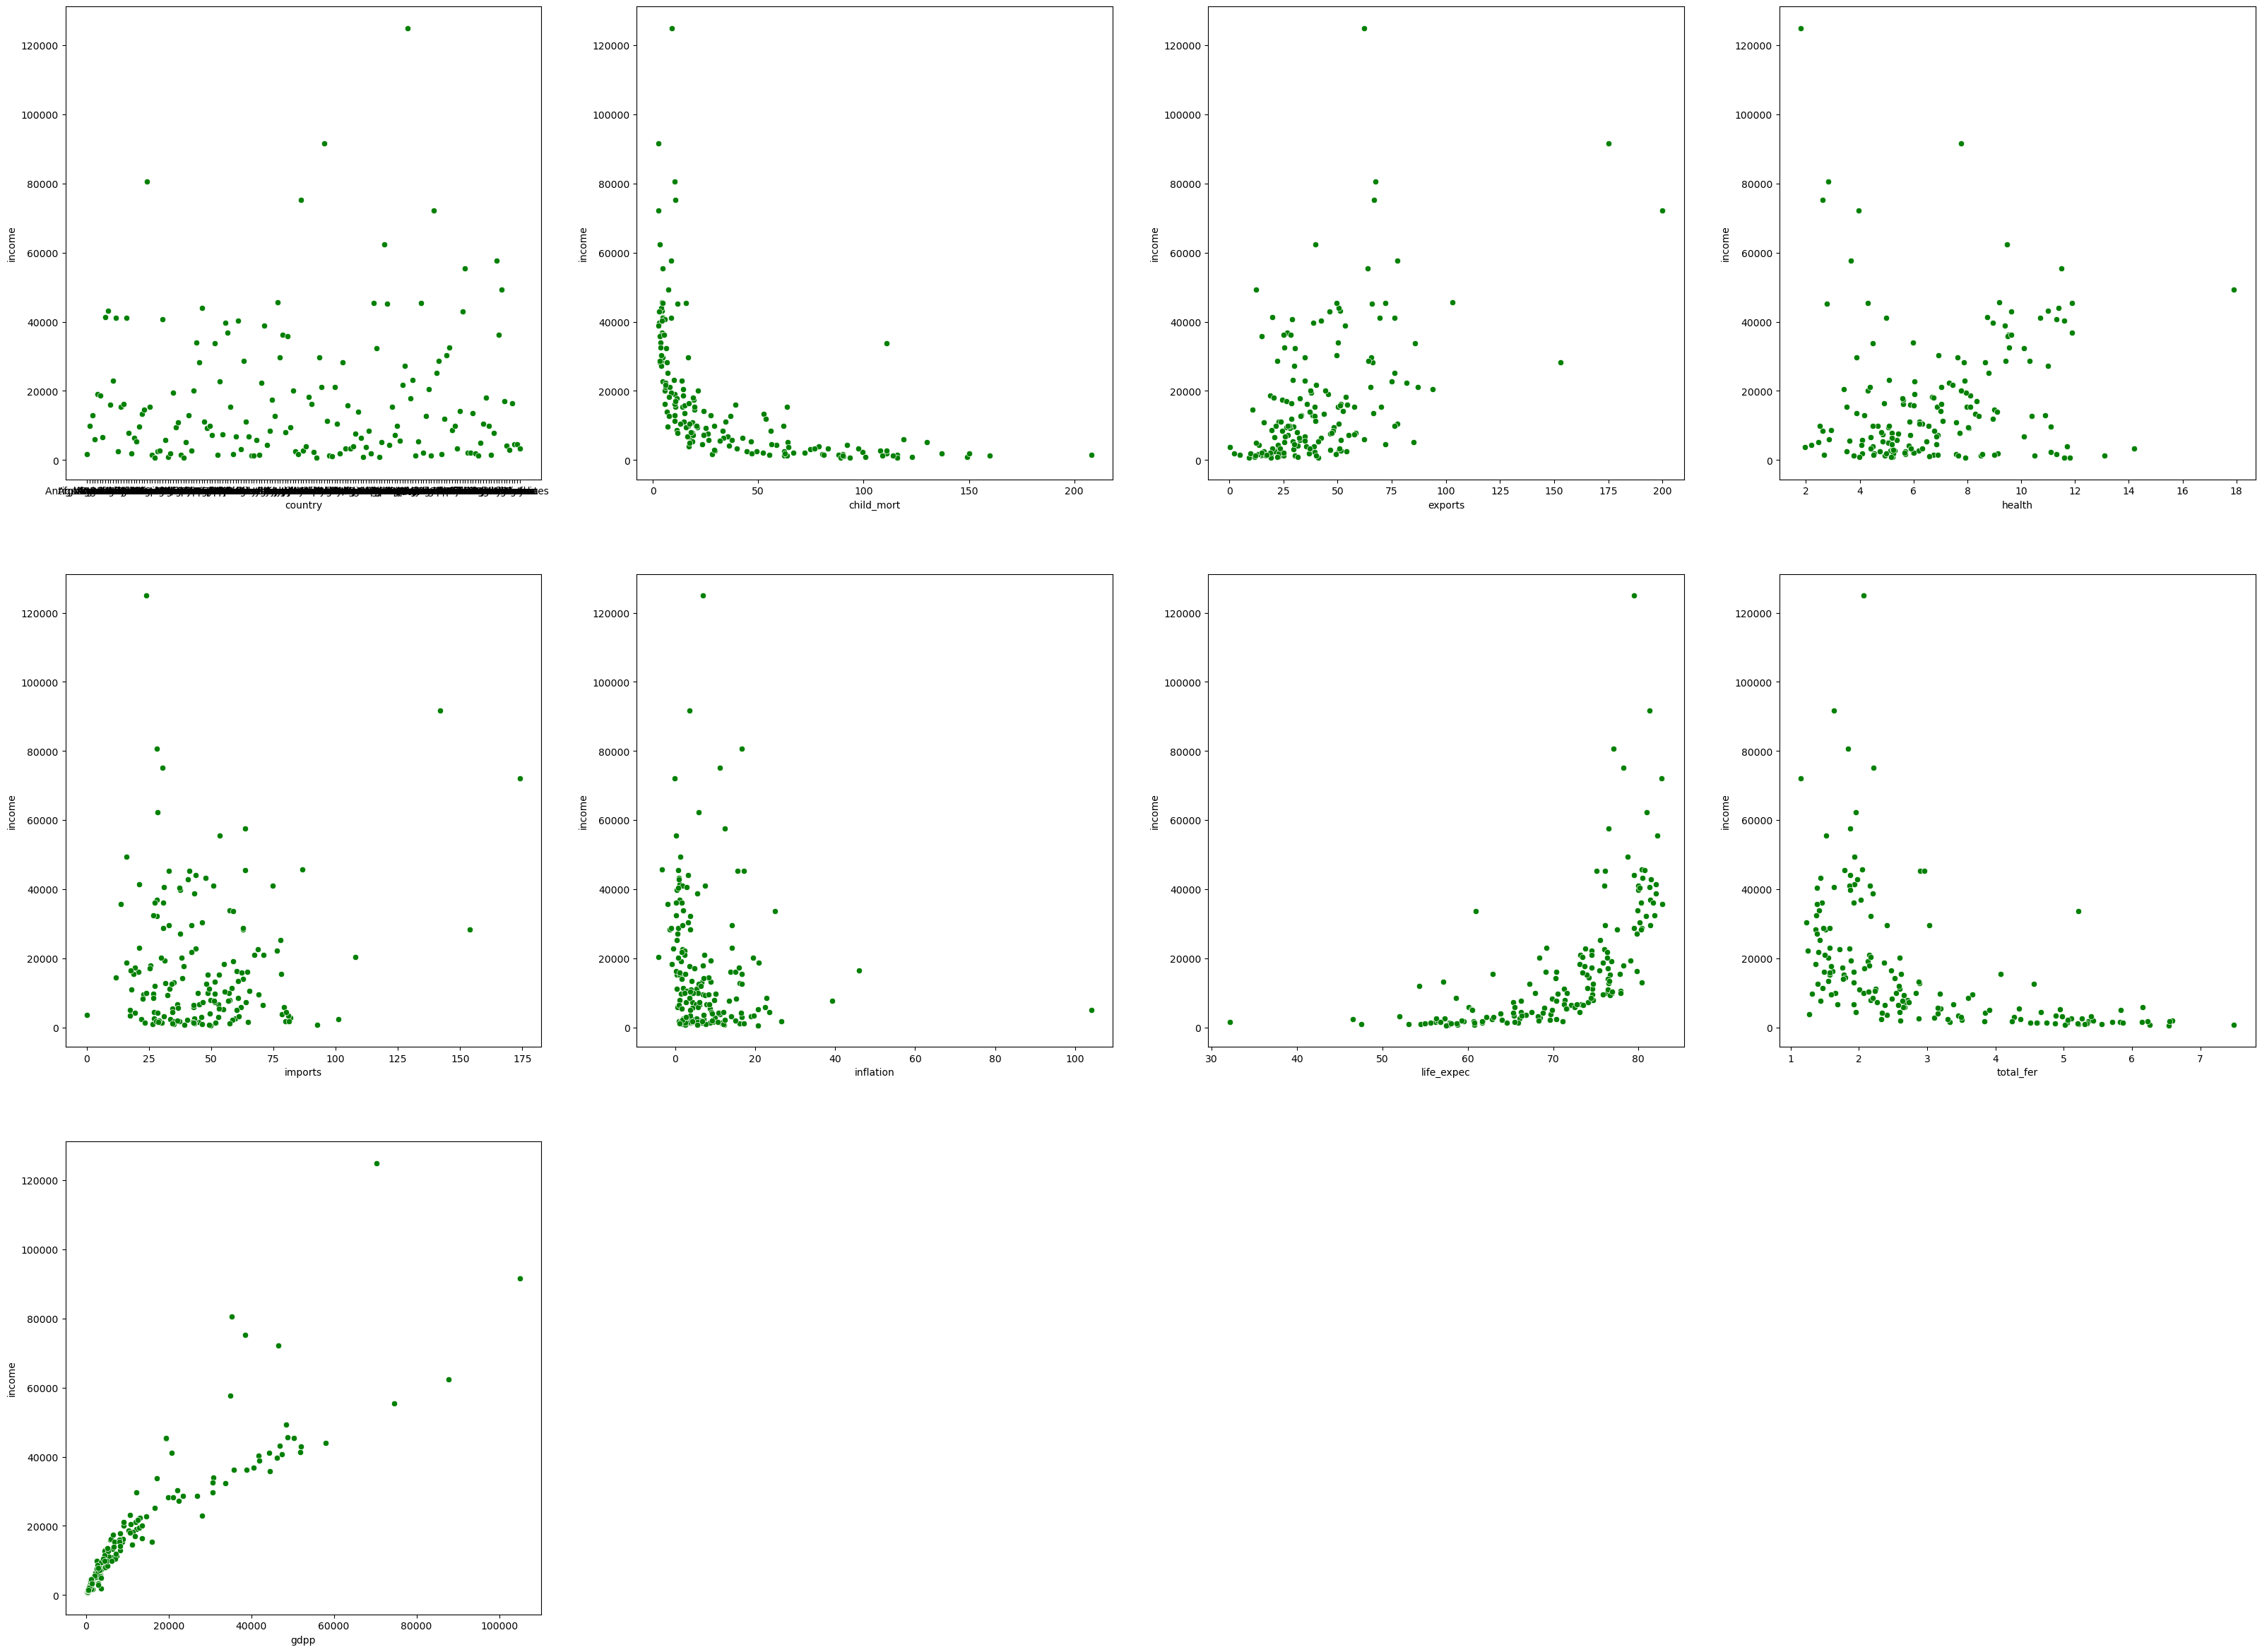

In [11]:
fig=plt.figure(figsize=(40,40))
for i,col in enumerate(df.drop(columns='income').columns):
    ax=fig.add_subplot(4 , 4,i+1)
    sns.scatterplot(x=col, y ='income' ,data=df , color = 'green')

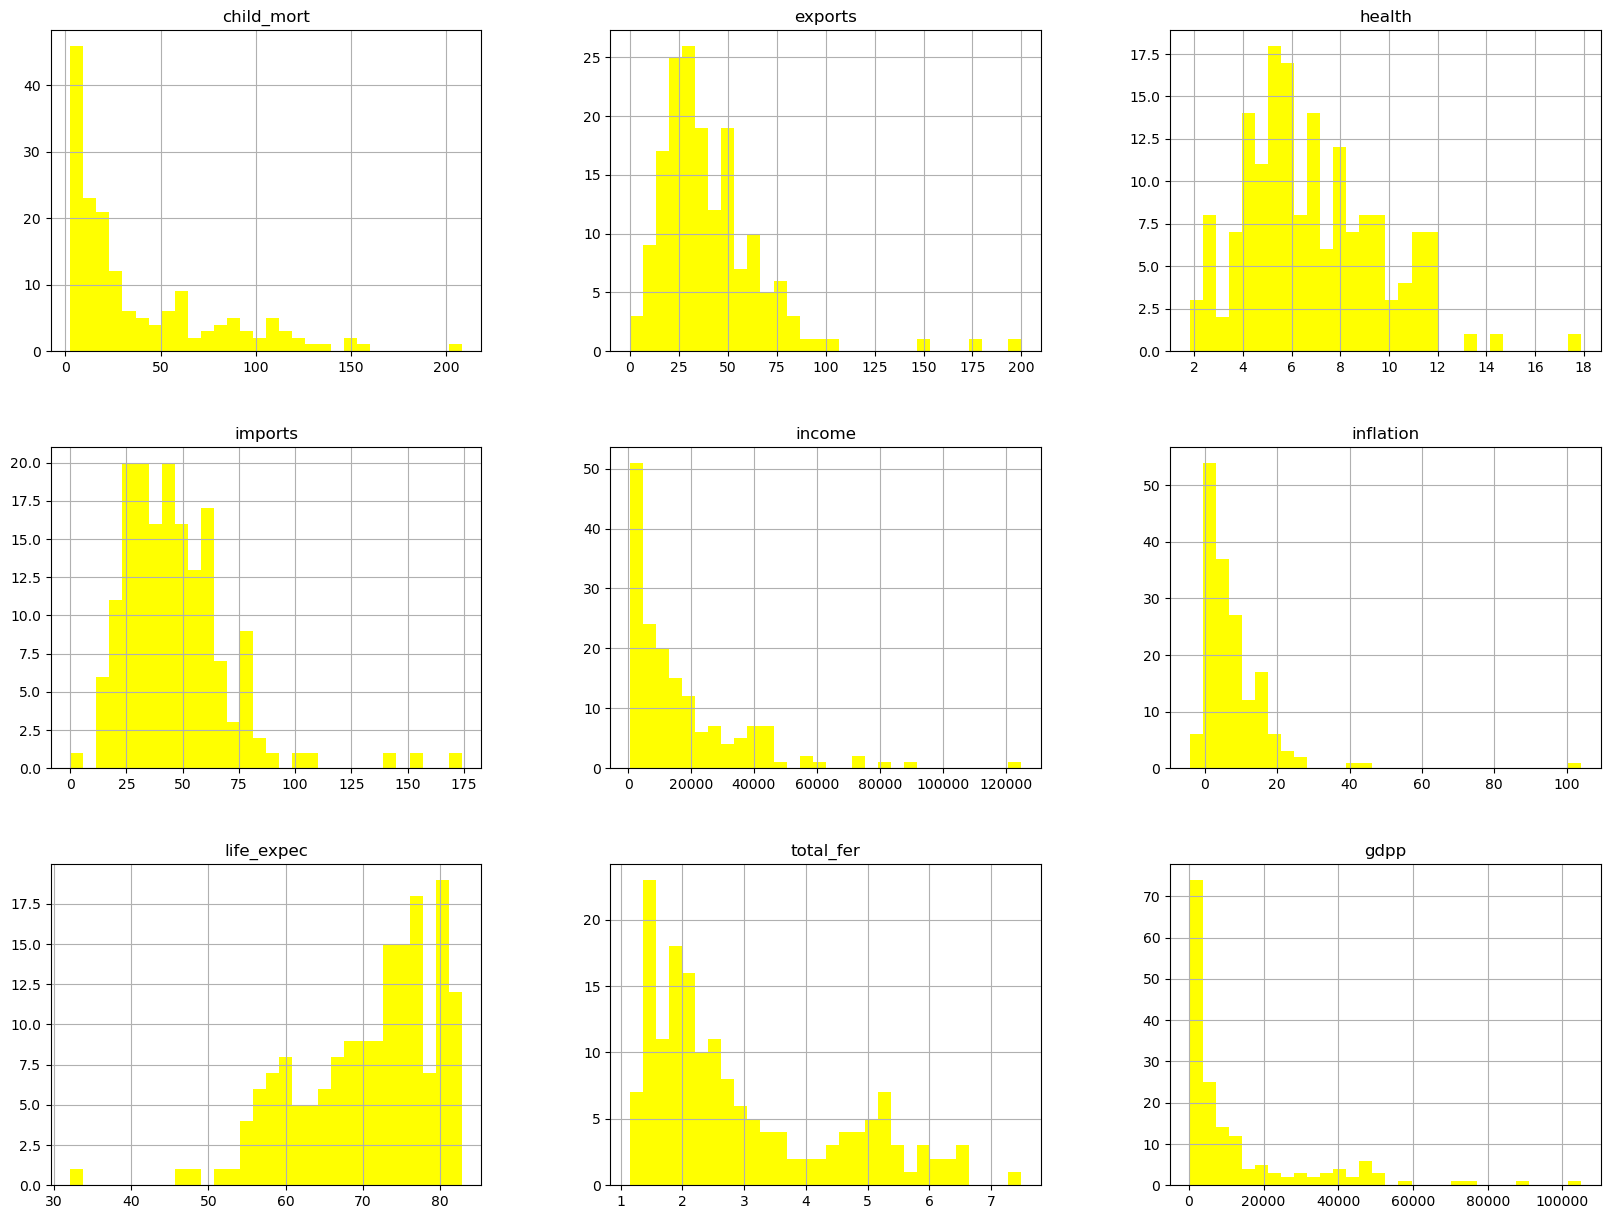

In [12]:
df.hist(bins=30,figsize=(20,15), color="yellow")
plt.show()

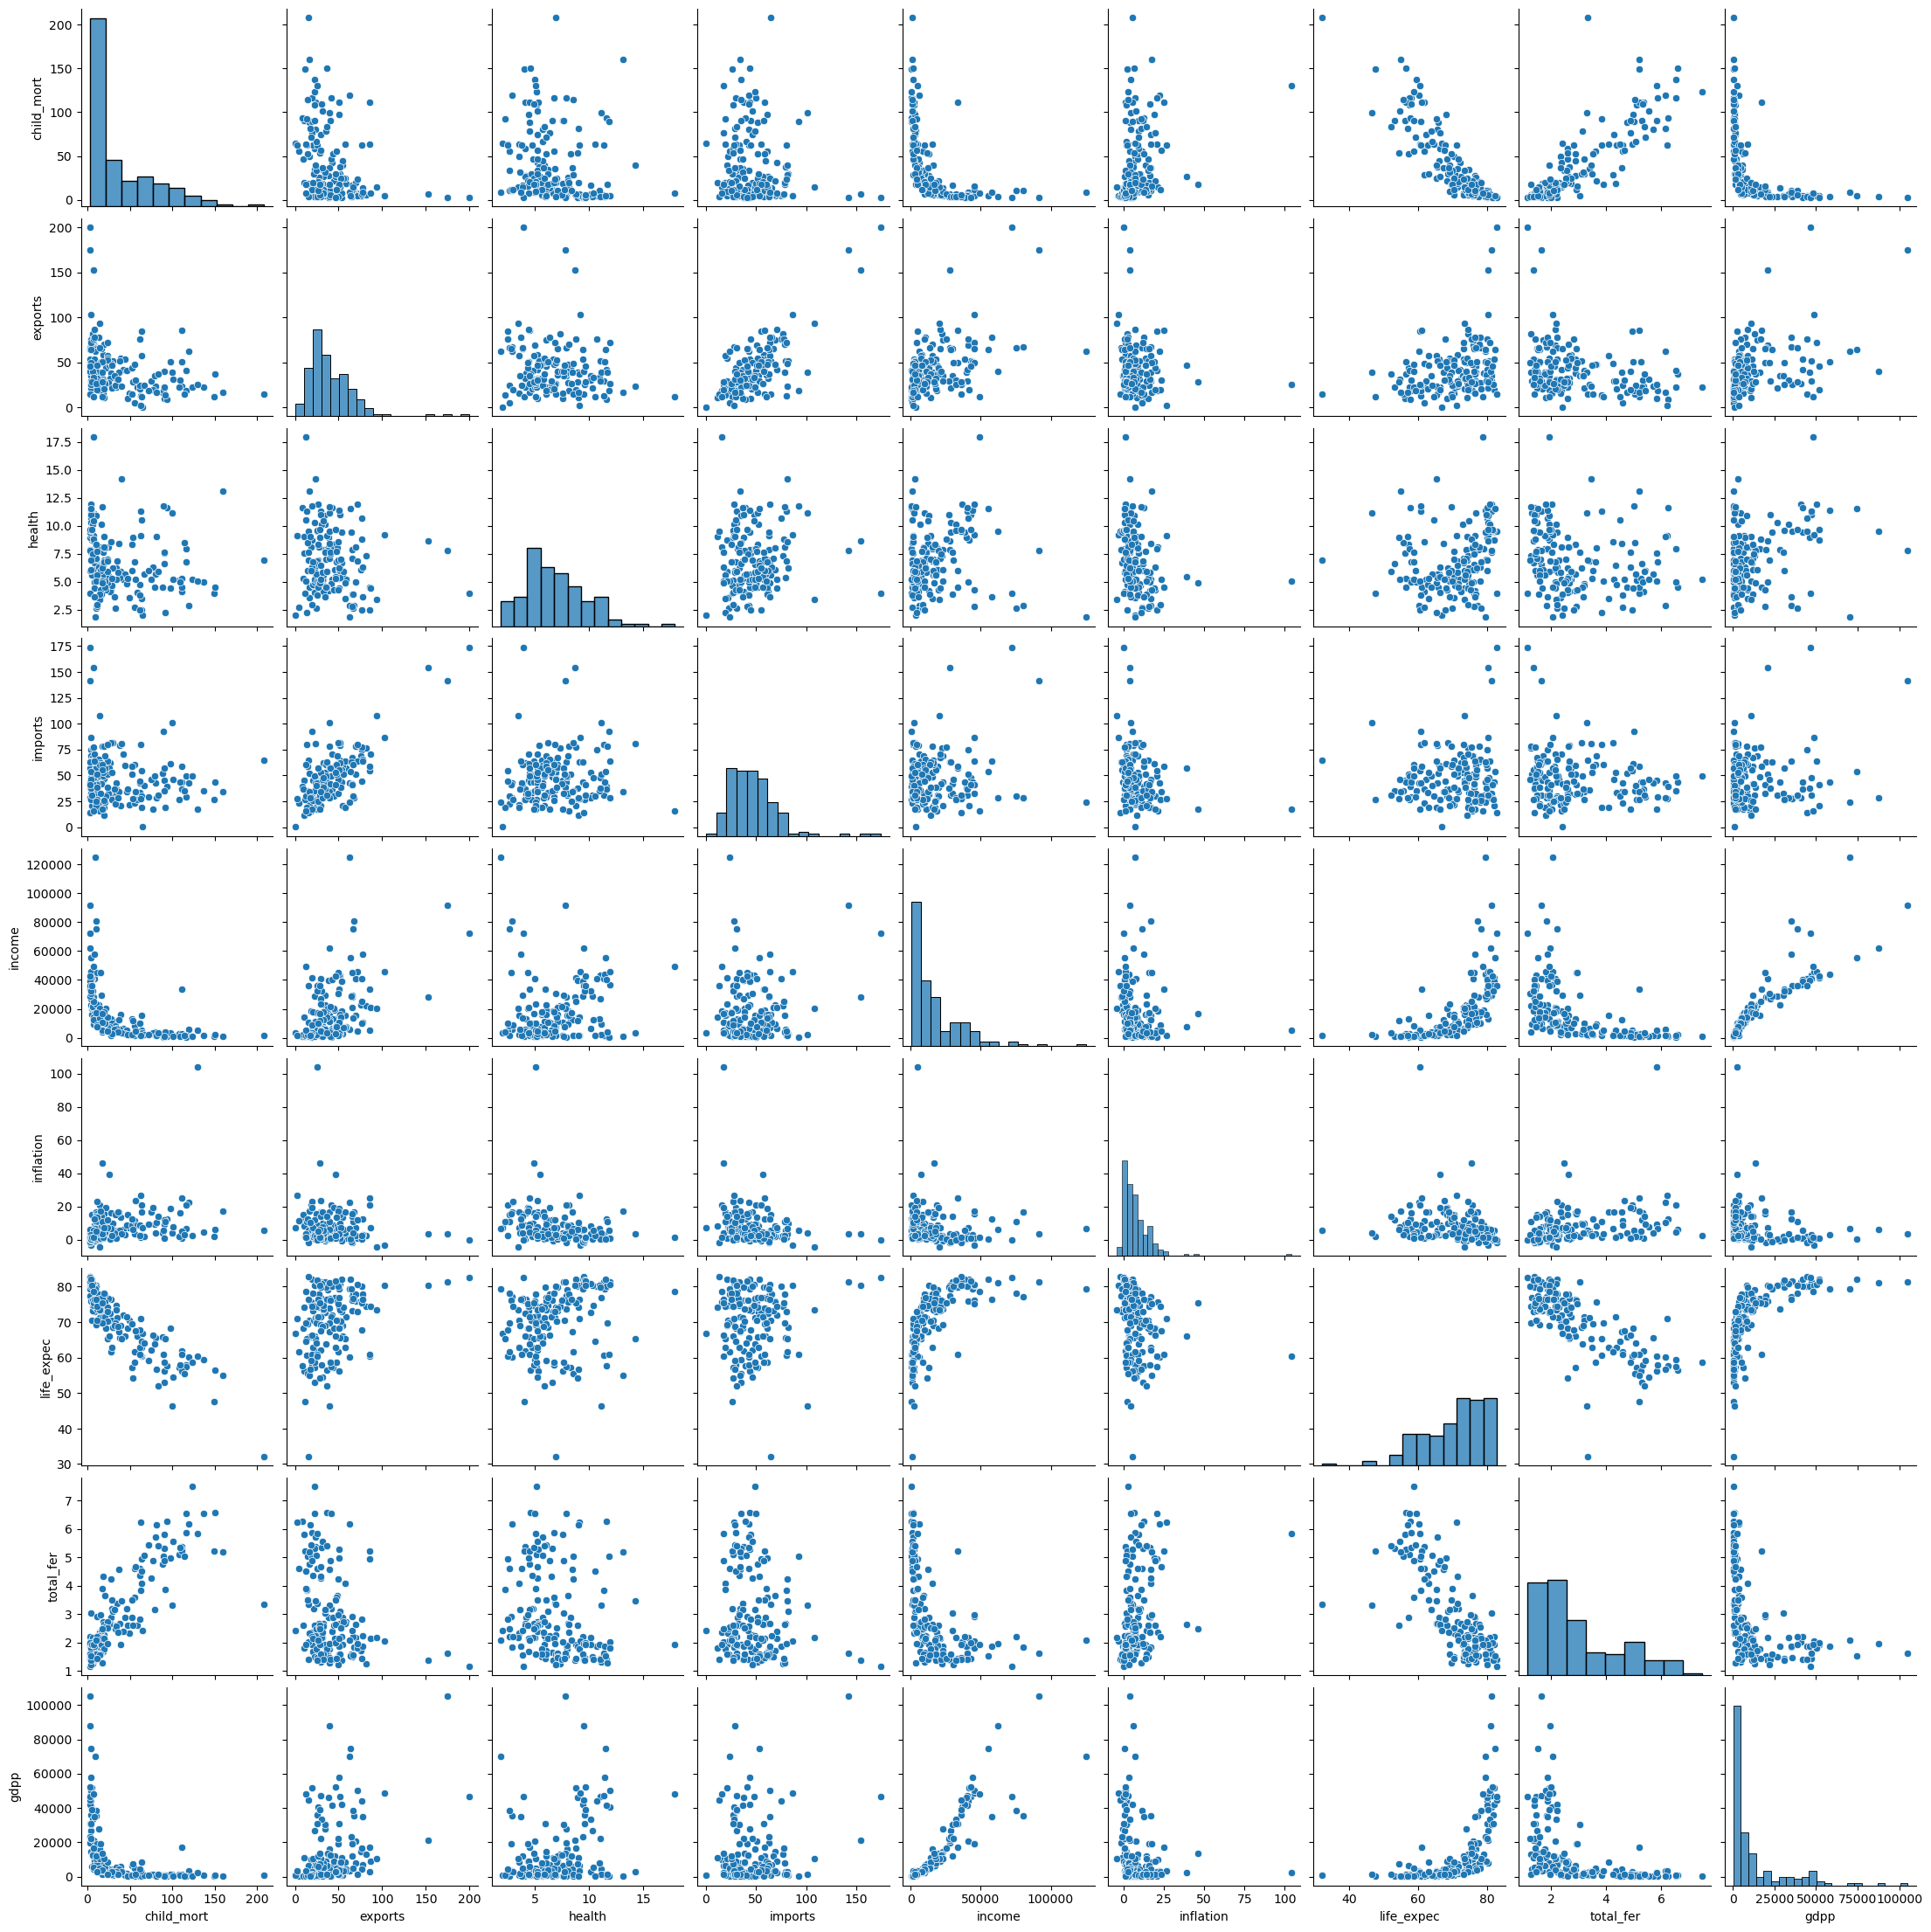

In [13]:
sns.pairplot(df)

In [14]:
#### If gdpp is HIGH:
#### child mortality is LOW
#### income is HIGH
#### inflation is LOW
#### life expectancy is HIGH
#### total fertility is LOW
#### health, imports and exports are MEDIUM

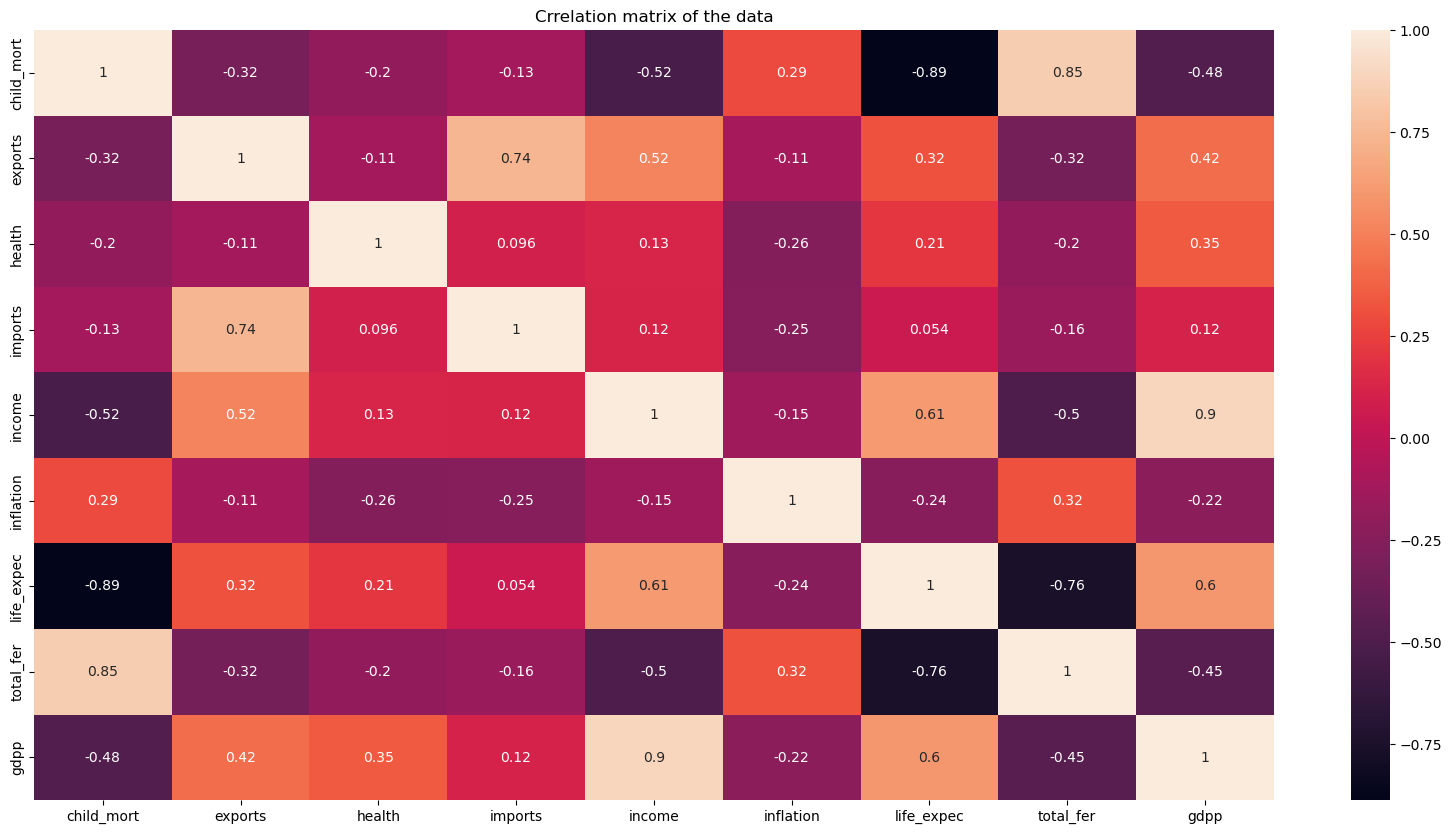

In [15]:
plt.figure(figsize =(20 , 10))
hm = sns.heatmap(df.corr() , annot=True )
hm.set(title = "Crrelation matrix of the data")
plt.show()

In [16]:
# exports is highly correlated with imports and income.
# health, exports, income are highly correlated with gdpp.
# child_mort is having high negative correlation with life_expec.
# total_fer is highly positively correlated with child_mort and negatively correlated with life_expec

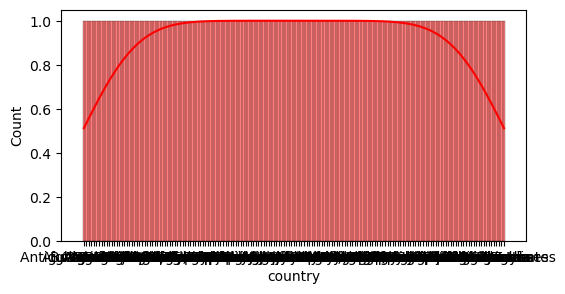

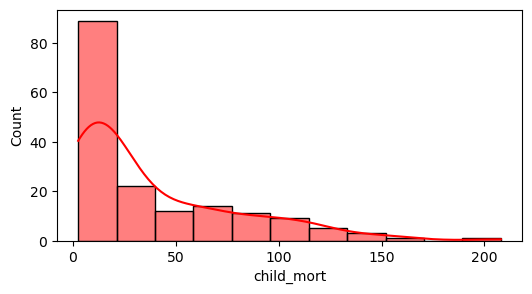

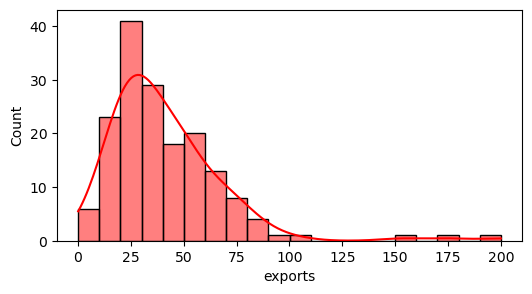

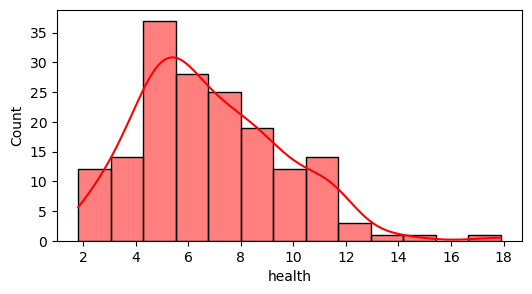

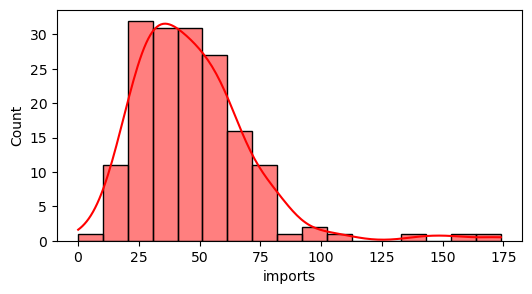

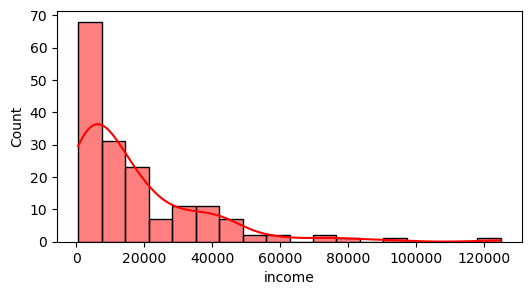

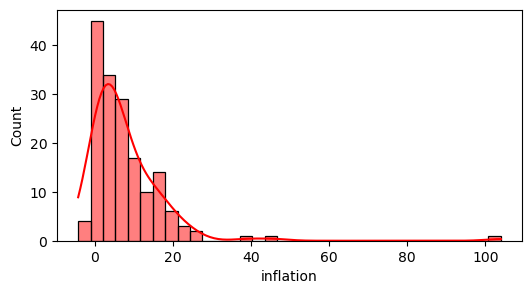

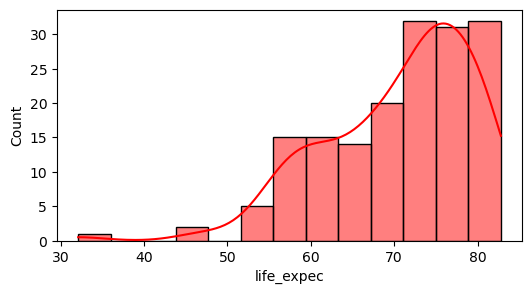

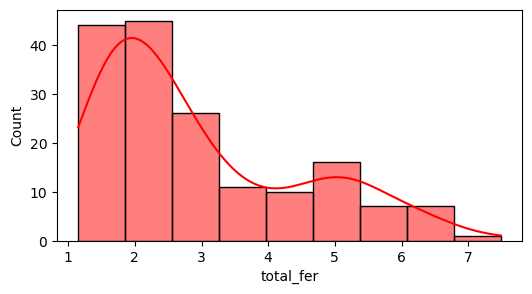

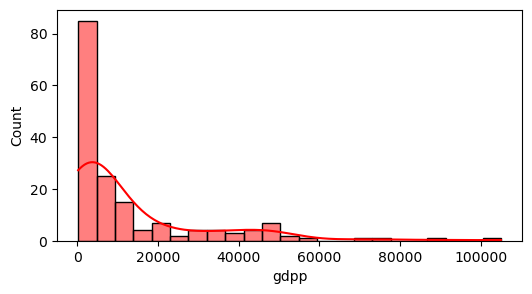

In [17]:
for i in columns :

    plt.figure(figsize=(6,3))
    sns.histplot(df[i], kde=True, color='r')
    plt.xlabel(i)

<AxesSubplot:>

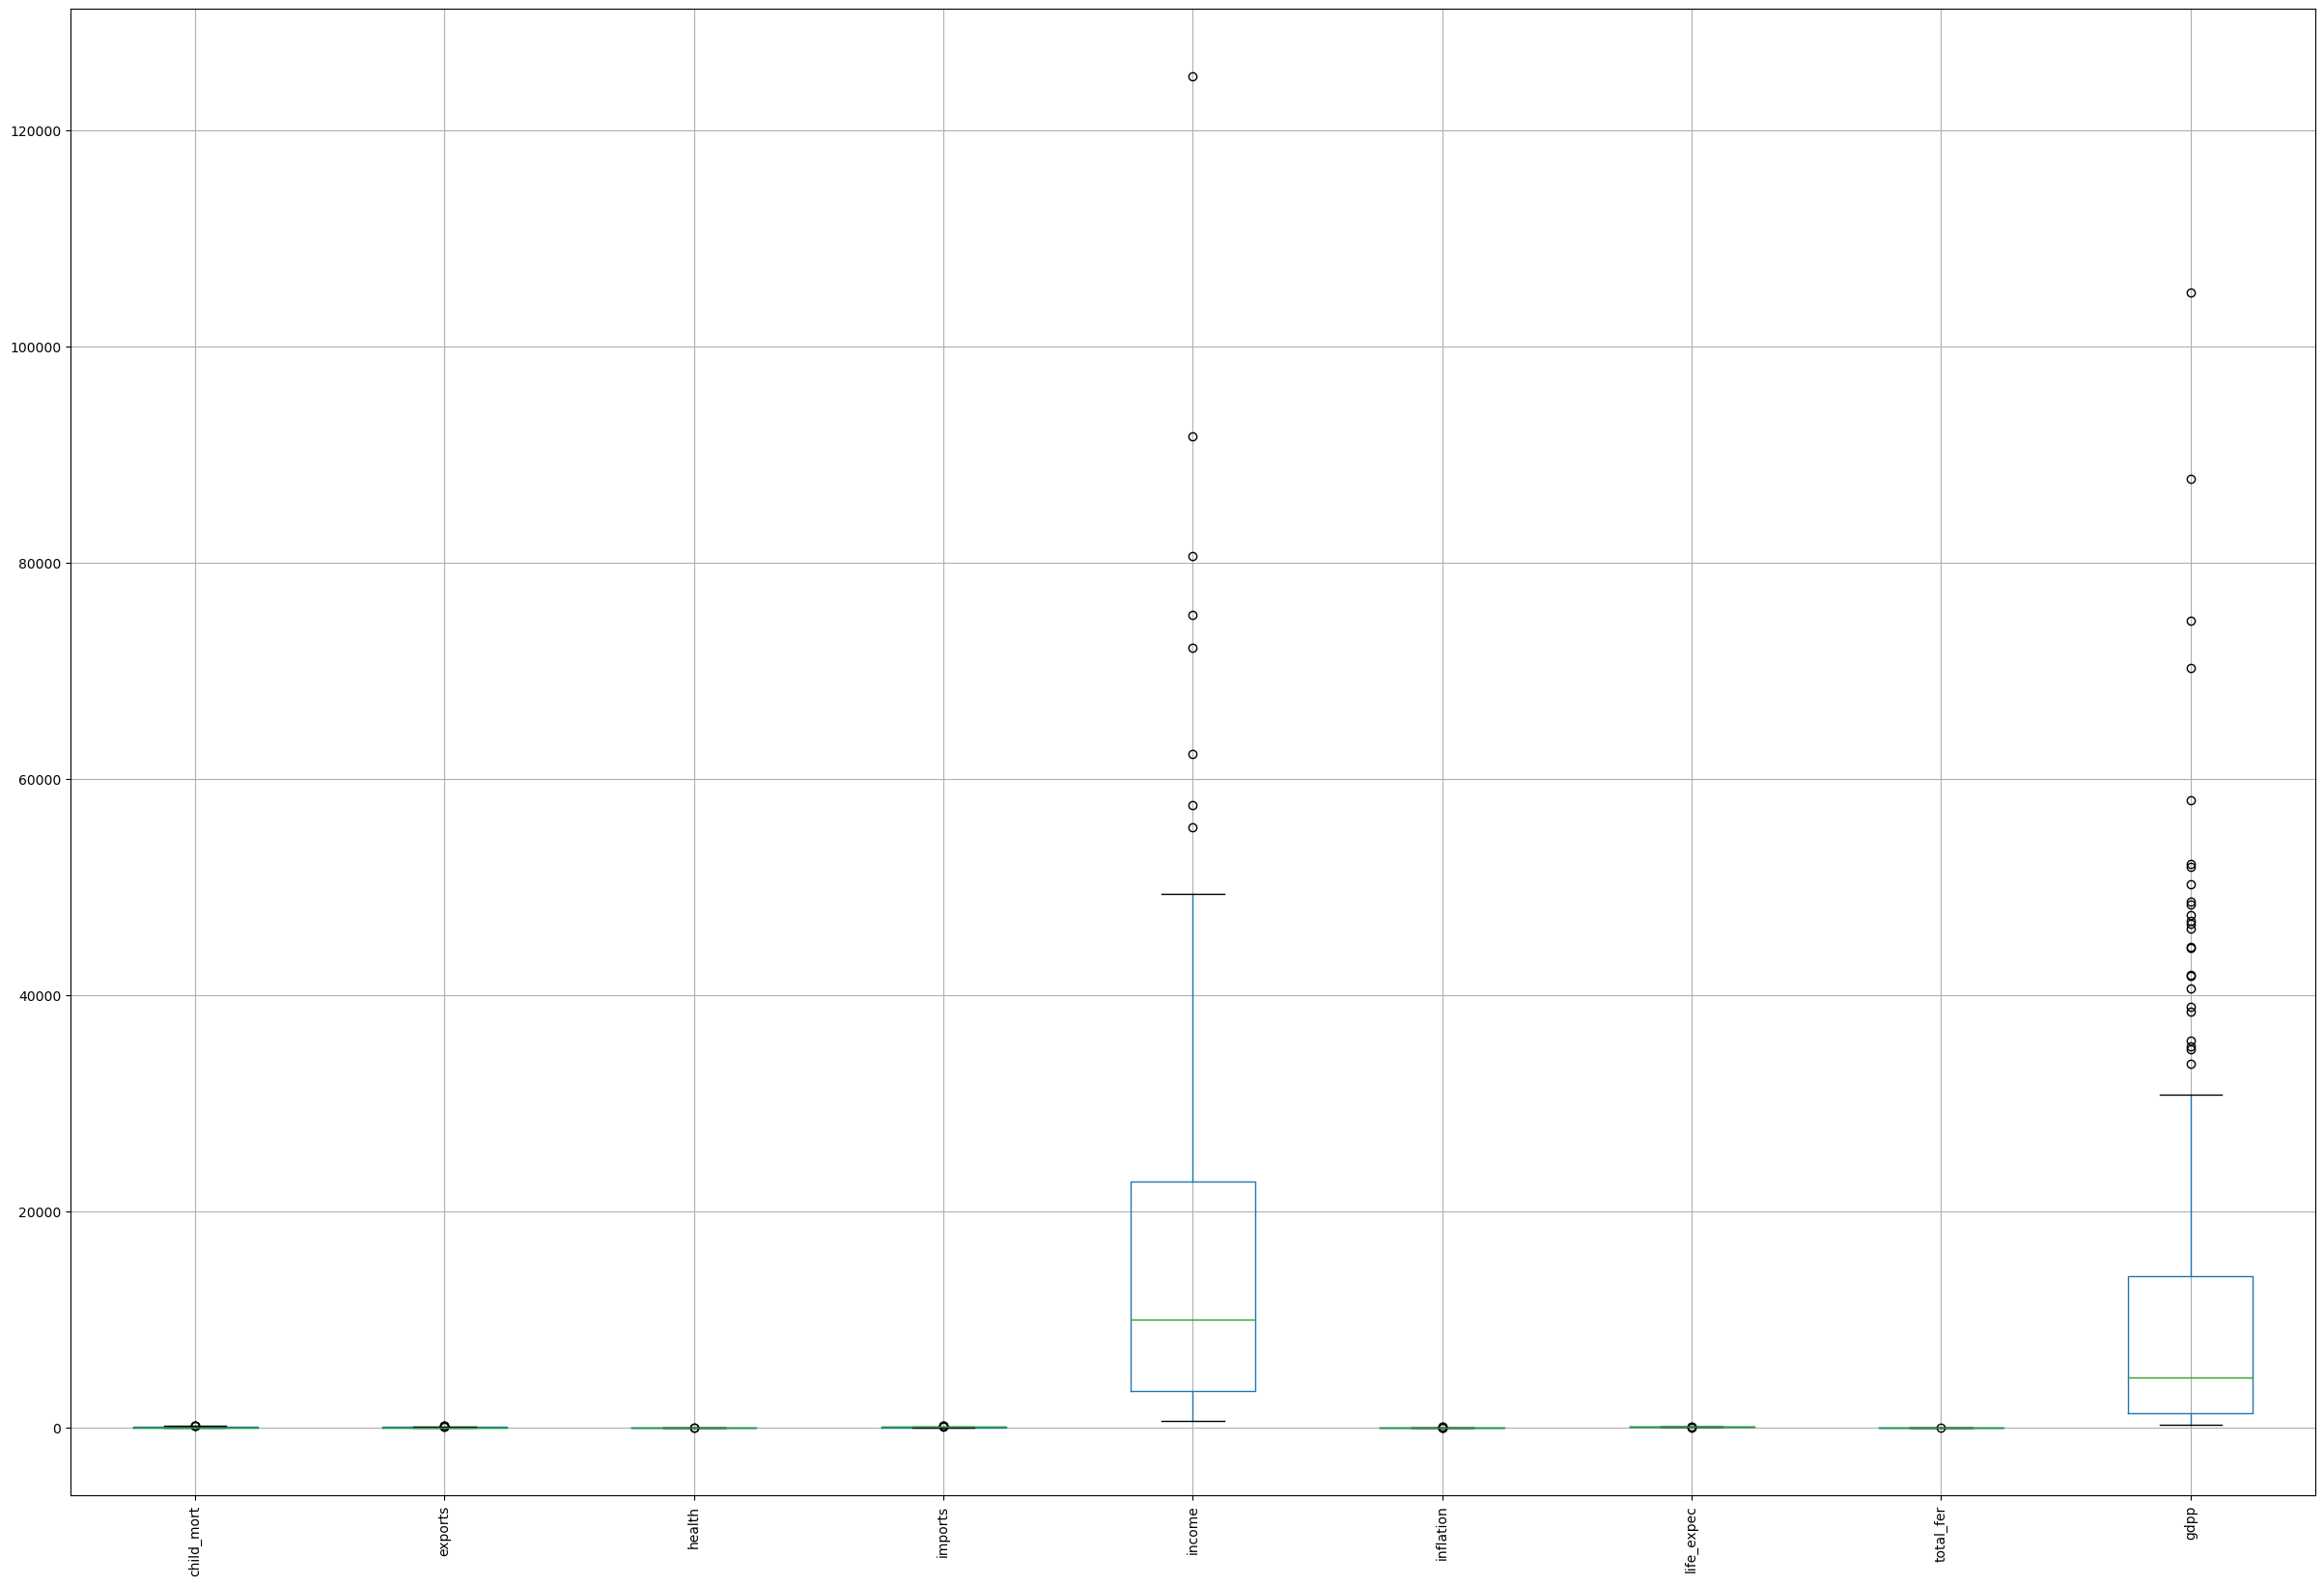

In [18]:
df.boxplot(rot=90 , figsize=(30,20))

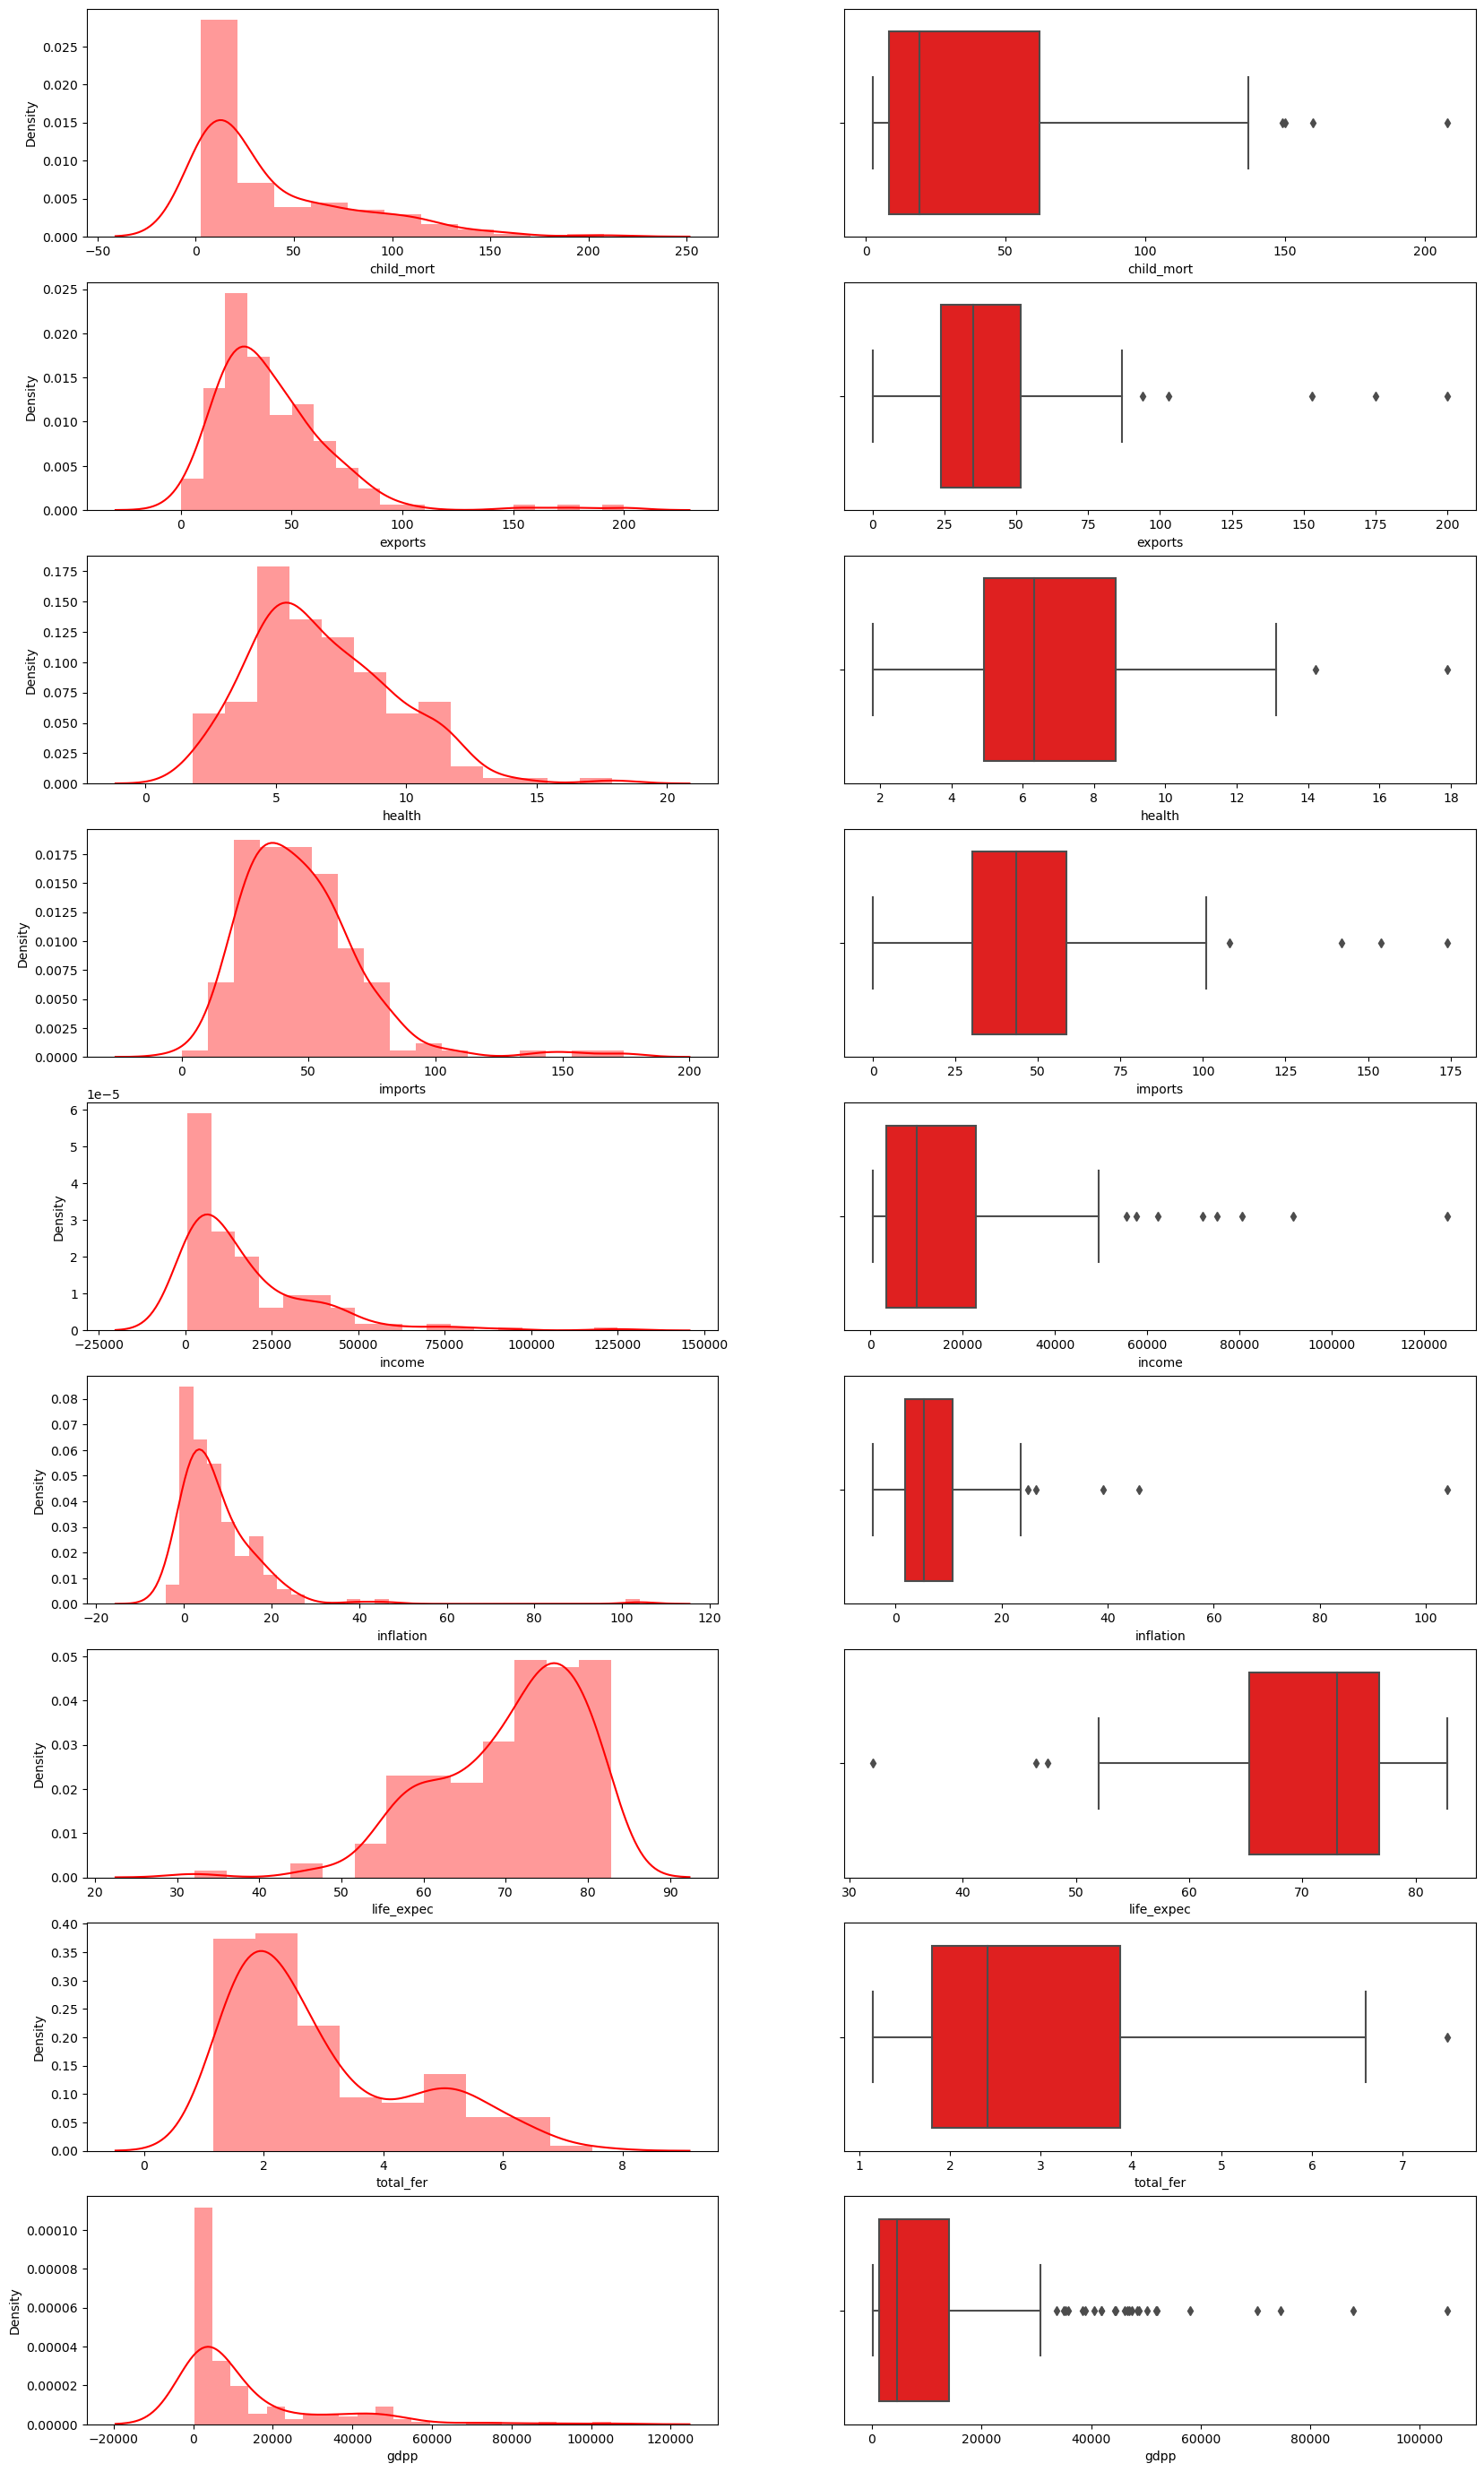

In [19]:
cols = np.array (df.columns [1:]).reshape (9 , -1)
fig,ax = plt.subplots (9 , 2 , figsize = (20 , 35))
for i in range (0 , 9):
        sns.distplot (df.loc[: , cols [i][0]] , ax = ax [i][0] , color = 'r')
        sns.boxplot (df.loc [: , cols [i][0]] , ax = ax [i][1] , color = 'r')
        plt.xlabel (cols [i][0])
plt.show ()

In [20]:
import plotly.express as px

fig = px.choropleth (df, locationmode = 'country names', locations = 'country', color = 'income',
                     title = "Distribution of 'INCOME' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show ()

In [21]:
import plotly.express as px

fig = px.choropleth (df, locationmode = 'country names', locations = 'country', color = 'health',
                     title = "Distribution of 'HEALTH' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show ()

In [22]:
import plotly.express as px

fig = px.choropleth (df, locationmode = 'country names', locations = 'country', color = 'exports',
                     title = "Distribution of 'EXPORTS' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show ()

In [23]:
import plotly.express as px

fig = px.choropleth (df, locationmode = 'country names', locations = 'country', color = 'imports',
                     title = "Distribution of 'IMPORTS' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show ()

In [24]:
import plotly.express as px

fig = px.choropleth (df, locationmode = 'country names', locations = 'country', color = 'gdpp',
                     title = "Distribution of 'GDPP' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show ()

In [25]:
import plotly.express as px

fig = px.choropleth (df, locationmode = 'country names', locations = 'country', color = 'life_expec',
                     title = "Distribution of 'life_expec' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show ()

In [26]:
import plotly.express as px

fig = px.choropleth (df, locationmode = 'country names', locations = 'country', color = 'child_mort',
                     title = "Distribution of 'child_mort' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show ()

In [27]:
############ drop the "Country" ###############
df1 = df.copy()
df1.drop(columns = ['country'] ,  inplace = True)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()
scaled_features = scaler.fit_transform (df1)
scaled_features


x = scaled_features


In [29]:
###### PCA model ###########
from sklearn.decomposition import PCA

pca = PCA()
pc_names = [f"PC{i + 1}" for i in range(scaled_features.shape[1])]
pca_df = pd.DataFrame(pca.fit_transform(scaled_features), columns = pc_names)

In [30]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310 -0.254597  0.383000   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677  0.084579  0.248919   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475 -0.401696 -0.087214   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209 -0.547996 -0.440835   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007 -0.206919  0.241978   
..        ...       ...       ...       ...       ...       ...       ...   
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748  0.009059 -0.098738   
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581  0.097274  0.206735   
164  0.498524  1.390744 -0.238526 -1.074098  1.176081  0.051607 -0.143627   
165 -1.887451 -0.109453  1.109752  0.056257  0.618365 -0.540917  0.060256   
166 -2.864064  0.485998  0.223167  0.816364 -0.274068  0.201378 -0.442185   

          PC8       PC9  
0    0.415076 -0.014148  
1   -0.221042  0.173316  
2   -0.184162  0.084037  
3   -0.355998 -0.091339  
4   -0.023681  0.094270  
..        ...       ...  
162  0.521886 -0.497803  
163 -0.078805 -0.275735  
164 -0.217590 -0.036522  
165  0.089495 -0.096049  
166  0.664338 -0.441482  

[167 rows x 9 columns]

In [31]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [32]:
pca.explained_variance_ratio_.shape


(9,)

In [33]:
evr = pca.explained_variance_ratio_
cvr = np.cumsum(evr)

In [34]:
def set(ax, fmt = "%g", padding = 0, digitSize = 10) :
    for cont in ax.containers :
        ax.bar_label(cont, fmt = fmt, padding = padding, size = digitSize)

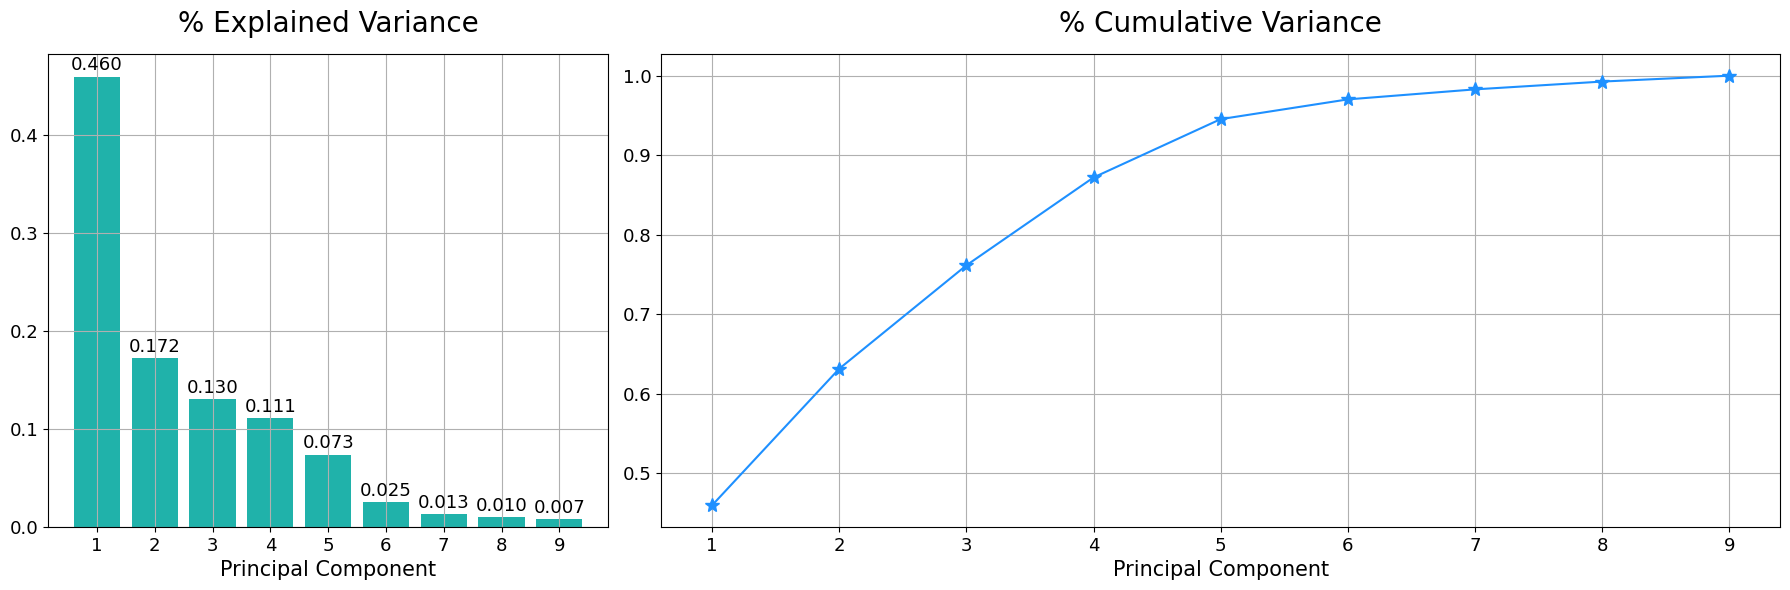

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (18,6), gridspec_kw = {"width_ratios" : [1,2]})

pc_numbers = np.arange(1, pca.n_components_ + 1)
ax[0].bar(pc_numbers, evr, color = "lightseagreen")
set(ax[0], fmt = "%.3f", digitSize = 13, padding = 2)
ax[0].set_xticks(pc_numbers) 
ax[0].tick_params(labelsize = 13)
ax[0].set_title("% Explained Variance",fontsize=20, y = 1.03)
ax[0].set_xlabel ("Principal Component", size = 15)
ax[0].grid()

ax[1].plot(pc_numbers, cvr, "-*",color = "dodgerblue",markersize = 10)
ax[1].tick_params(labelsize = 13)
ax[1].set_title("% Cumulative Variance", fontsize=20, y = 1.03)
ax[1].set_xlabel ("Principal Component", size = 15)
ax[1].grid()

plt.tight_layout()
plt.show()


In [36]:
######  it shows that the first PC has 46% of the information which is not enough,so we should select more PCs. ########
##### pc1 to pc5

In [37]:
pca_new = PCA(n_components = 5)
pca_df_new = pd.DataFrame(pca_new.fit_transform(scaled_features), columns = pc_names[:5])

In [38]:
pca_df1 = pca_df_new.copy()

In [39]:
pca_df1

PC1       PC2       PC3       PC4       PC5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

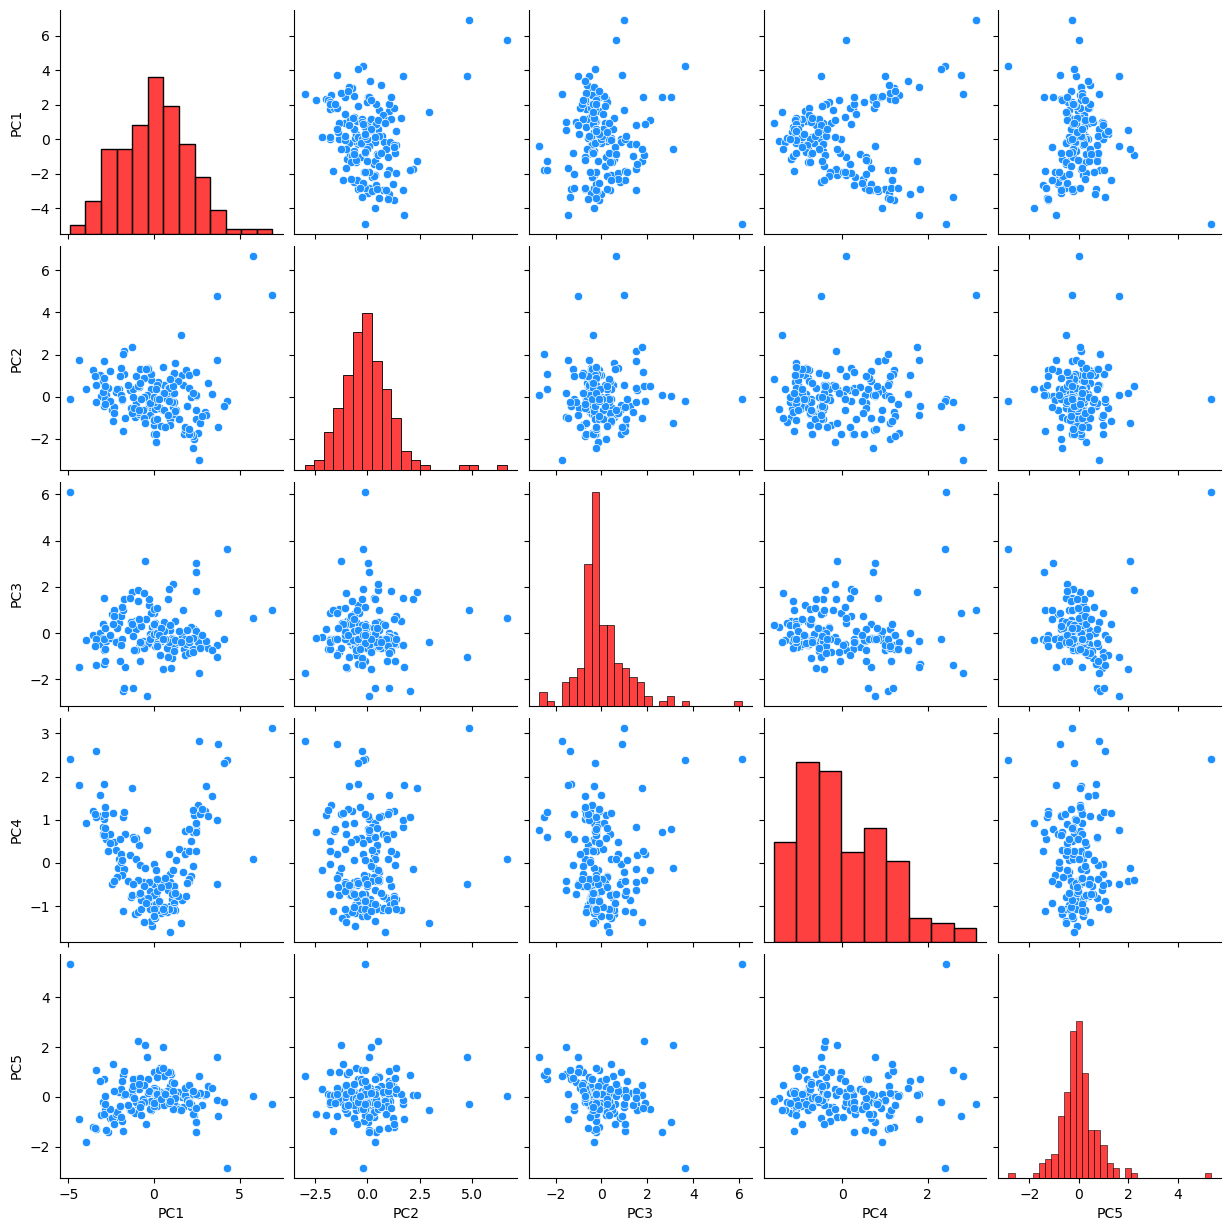

In [40]:
sns.pairplot(pca_df1, plot_kws = {"color" : "dodgerblue"}, diag_kws = {"color" : "r"})
plt.show()

In [41]:
var_ratio={}
for n in range(2,10):
    pca=PCA(n_components=n)
    pca_components = pca.fit(scaled_features)
    var_ratio[n]=sum(pca.explained_variance_ratio_)

In [42]:
var_ratio

{2: 0.6313336543771412,
 3: 0.7613762433466718,
 4: 0.8719078614023911,
 5: 0.9453099756439515,
 6: 0.9701523224082289,
 7: 0.9827566263898792,
 8: 0.9925694437691407,
 9: 1.0000000000000002}

In [43]:
######################  K_MEANS  ######################

In [44]:
kmean_set = {"init" : "random" , "n_init" : 10 , "max_iter" : 300 , "random_state" : 42}

In [45]:
scaler1 = StandardScaler()
scaler1_features = scaler1.fit_transform(df1)

In [46]:
list = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, **kmean_set)
    kmeans.fit(scaler1_features)
    list.append(kmeans.inertia_)

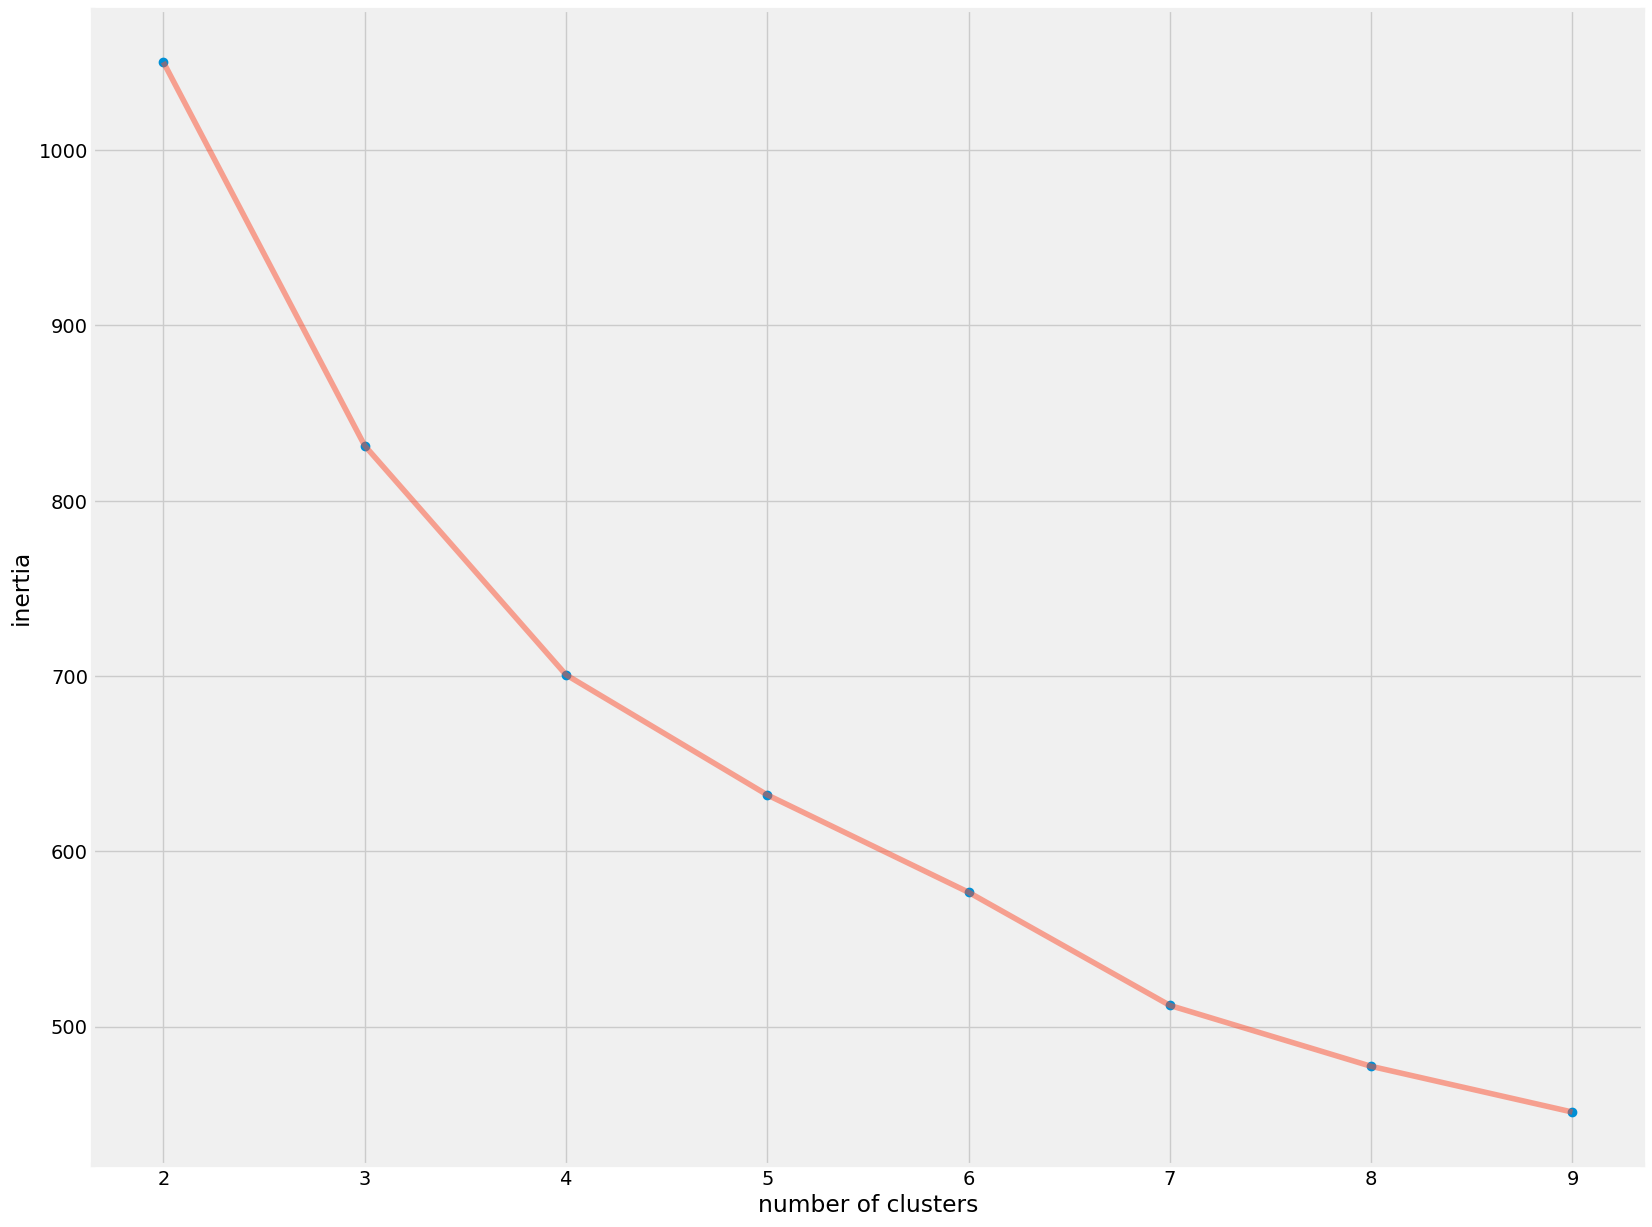

In [47]:
plt.figure(figsize =(20 , 15))
plt.style.use("fivethirtyeight")
plt.plot(range(2,10) , list , 'o')
plt.plot(range(2,10), list,'-' , alpha = 0.5)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

In [48]:
k1 = KneeLocator(range(2,10) , list , curve="convex" , direction = "decreasing")
k1.elbow

4

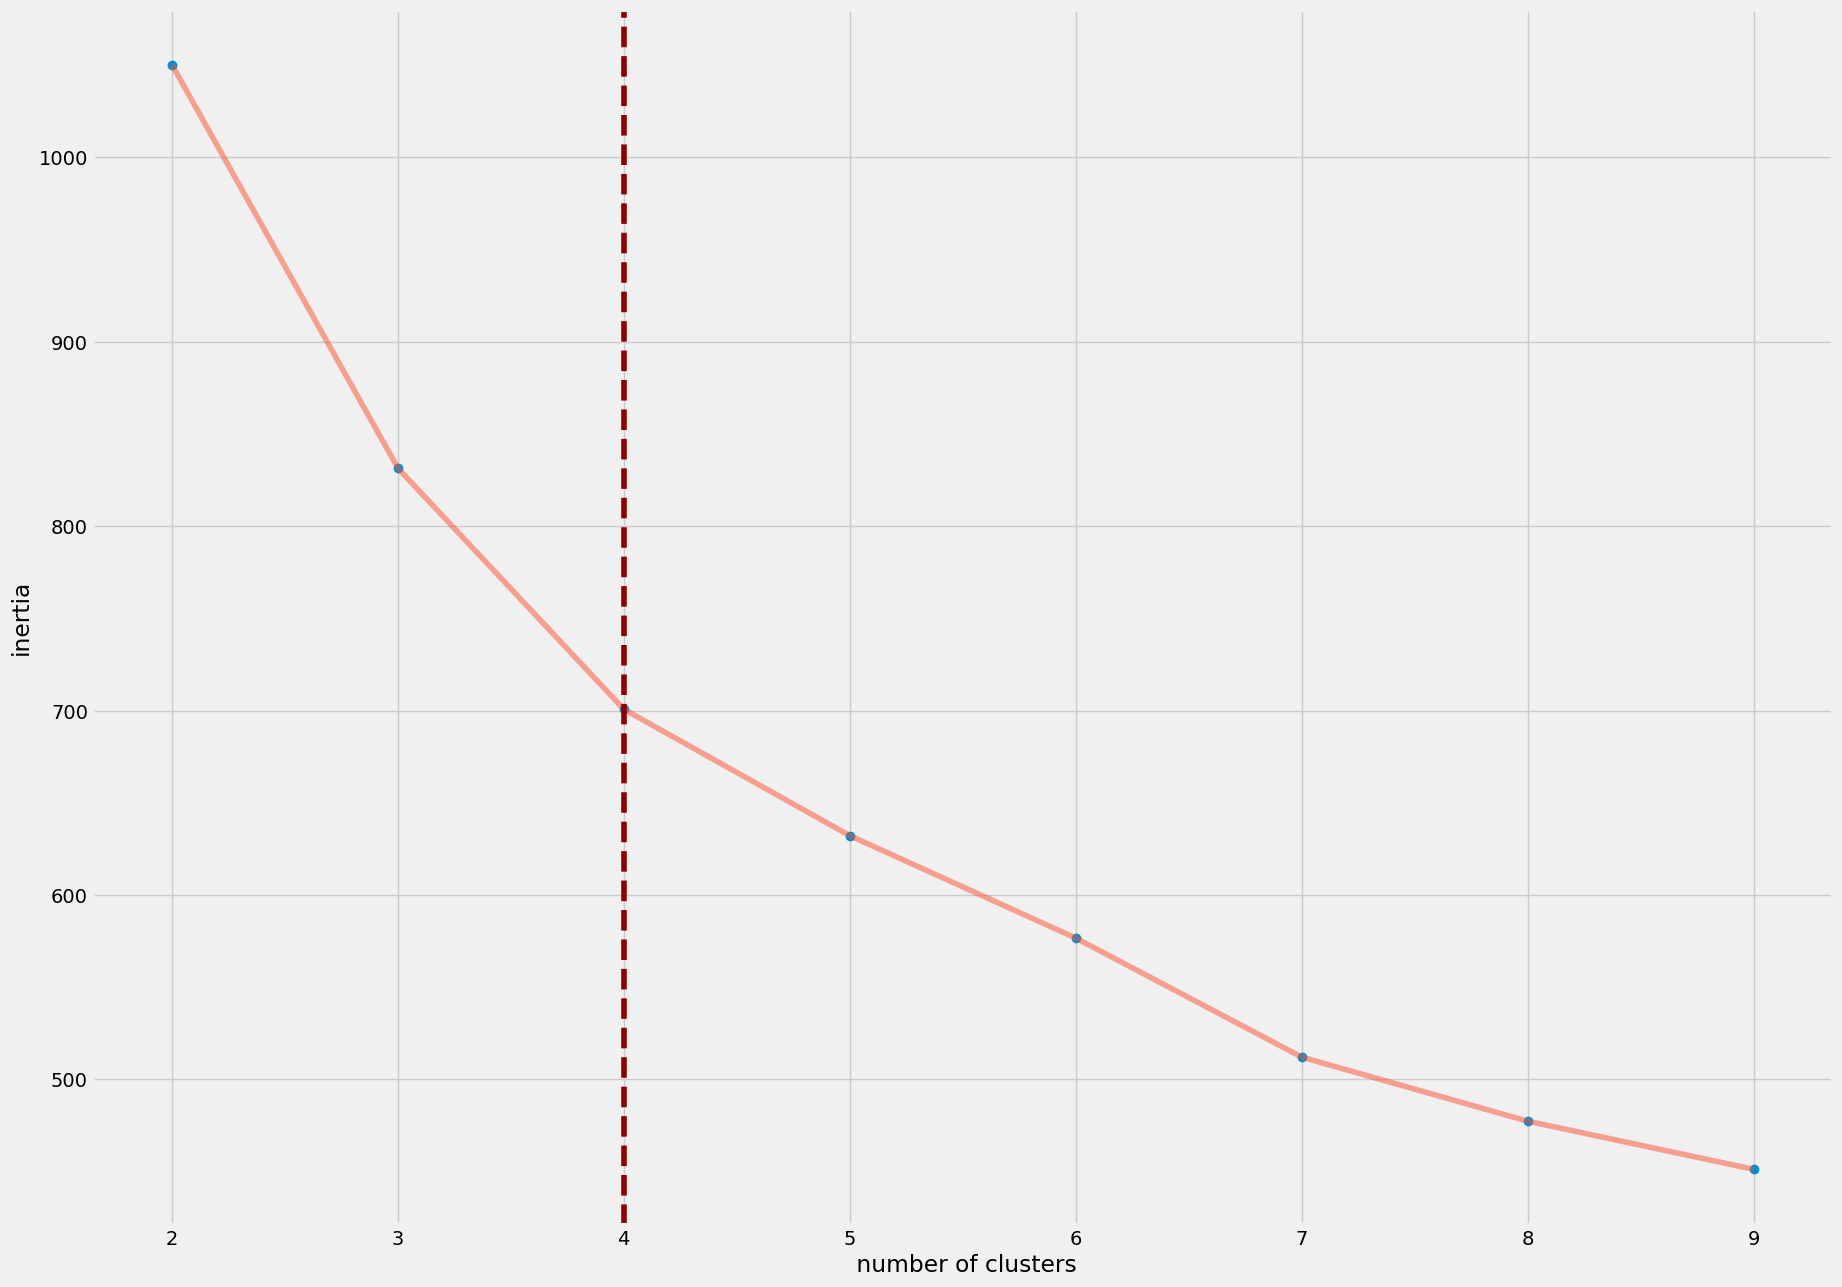

In [49]:
plt.figure(figsize =(20 , 15))
plt.style.use("fivethirtyeight")
plt.plot(range(2,10), list , 'o')
plt.plot(range(2,10), list,'-' , alpha = 0.5)
plt.xticks(range(2,10)) 
plt.xlabel(" number of clusters")
plt.ylabel("inertia")
plt.axvline(x=k1.elbow, color='darkred', label="anxline - full height", ls='--')
            
plt.show()

In [50]:
###############  elbow method: k=4   ##############

In [51]:
silhouette_coefficients =[]
for k in range(2,10):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmean_set)
    kmeans.fit(scaler1_features)
    score= silhouette_score(scaler1_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [52]:
silhouette_coefficients

[0.28735668921406704,
 0.28329575683463126,
 0.303676957667828,
 0.21799590052841472,
 0.2235914006755472,
 0.24325950330001792,
 0.21811049382568184,
 0.18772966709758224]

In [53]:
calinski_harabasz_coefficients =[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k, **kmean_set)
    kmeans.fit(scaler1_features)
    score= calinski_harabasz_score(scaler1_features, kmeans.labels_)
    calinski_harabasz_coefficients.append(score)

In [54]:
 calinski_harabasz_coefficients

[71.13746166773552,
 66.23475806200629,
 62.2109971805348,
 55.791329054274634,
 51.73262656184852,
 51.60375013597078,
 48.80856769802686,
 46.03647971601178]

In [55]:
davies_bouldin_coefficients =[]
for k in range(2,10):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmean_set)
    kmeans.fit(scaler1_features)
    score= davies_bouldin_score(scaler1_features, kmeans.labels_)
    davies_bouldin_coefficients.append(score)

In [56]:
davies_bouldin_coefficients

[1.3042586920733252,
 1.2769056099698288,
 1.0419060938611255,
 1.261296693584971,
 1.291847059994066,
 1.091257735241905,
 1.1824139649064556,
 1.241283579750472]

In [57]:
df_kmeans_4=df.copy()

In [58]:
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(scaler1_features)
df_kmeans_4['cluster'] = kmeans_4.labels_
df_kmeans_4.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        1  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        1  
4       1.44        76.8       2.13  12200        0

In [59]:
df_kmeans_4['cluster'].value_counts()

0    88
1    46
2    30
3     3
Name: cluster, dtype: int64

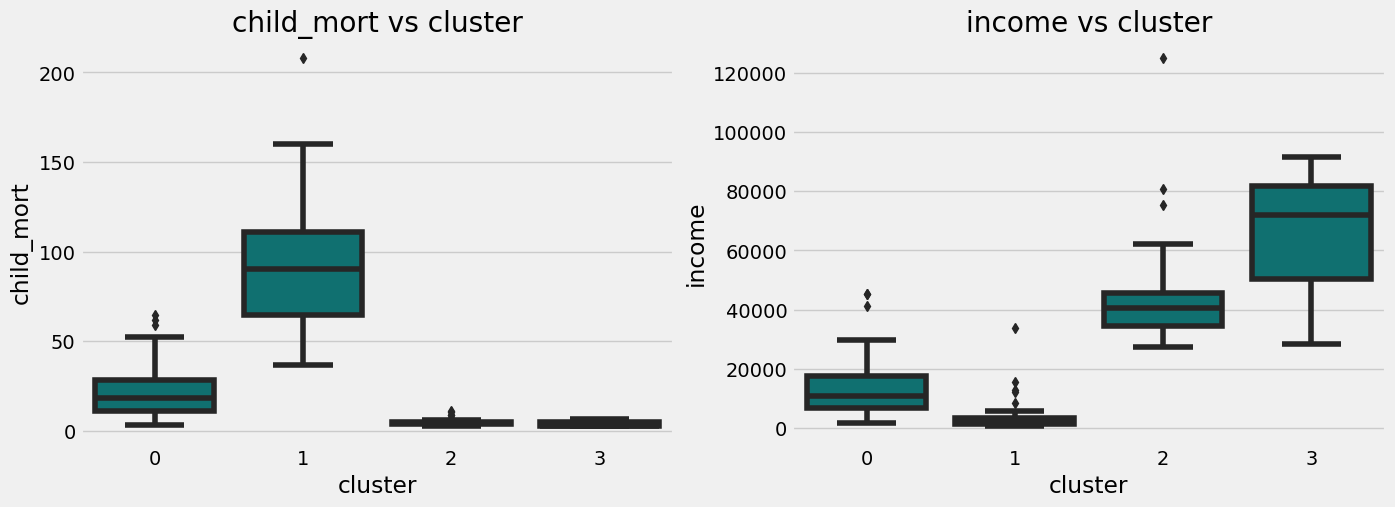

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data  = df_kmeans_4, color = 'teal');
plt.title('child_mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'income', data  = df_kmeans_4, color = 'teal');
plt.title('income vs cluster')

plt.show()

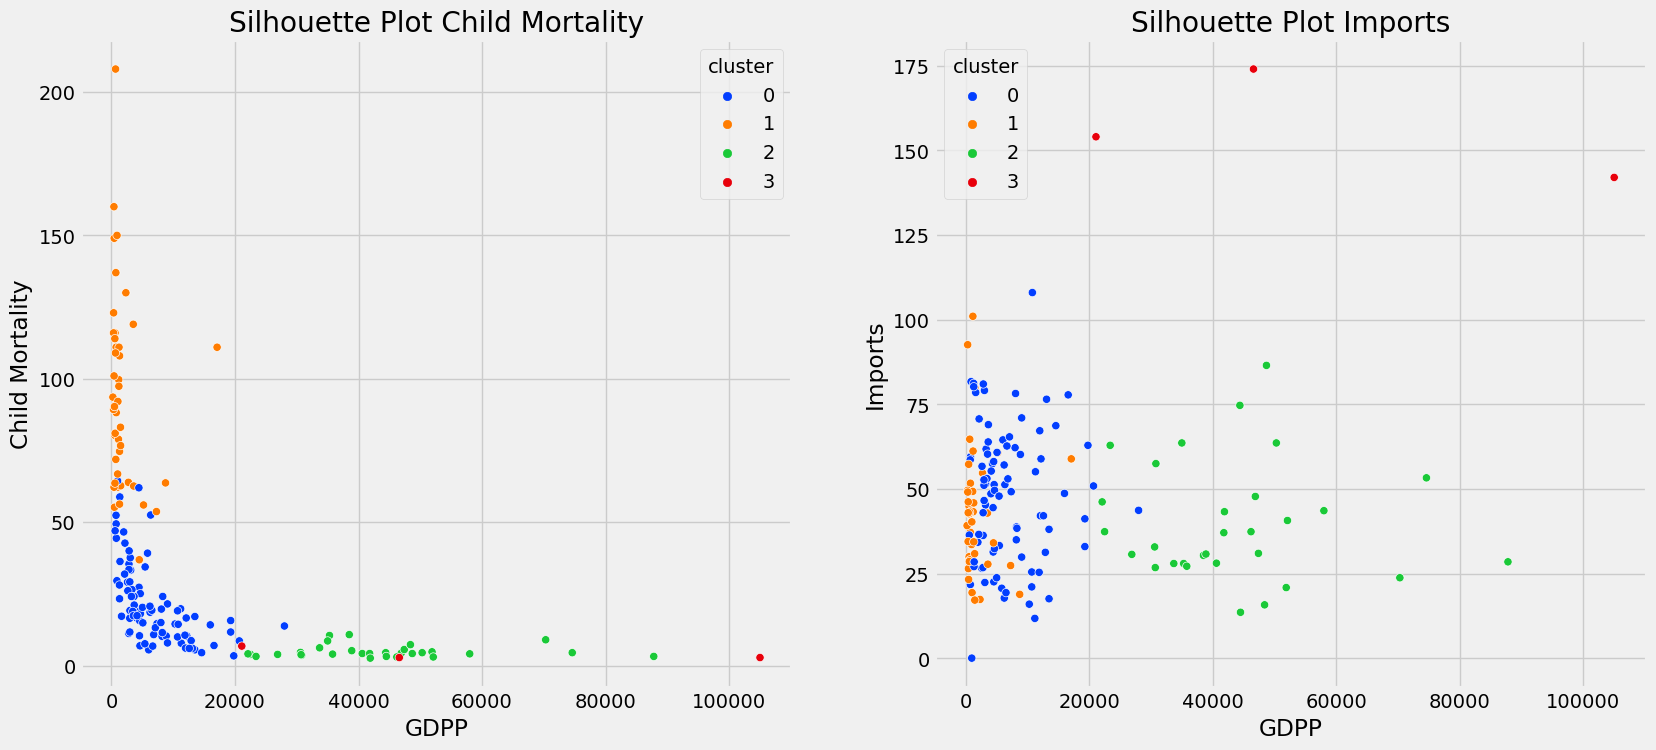

In [61]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data =df_kmeans_4, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_kmeans_4, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [62]:
 #### Based on the above plot, it was observed that the k=4 model could not cluster well.Therefore, we build the model again with 3 clusters.

In [63]:
df_kmeans_3=df.copy()

In [64]:
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(scaler1_features) # fit model with country_pca data
df_kmeans_3['cluster'] = kmeans_3.labels_
df_kmeans_3.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        0  
1       4.49        76.3       1.65   4090        1  
2      16.10        76.5       2.89   4460        1  
3      22.40        60.1       6.16   3530        0  
4       1.44        76.8       2.13  12200        1

In [65]:
df_kmeans_3['cluster'].value_counts()

1    84
0    47
2    36
Name: cluster, dtype: int64

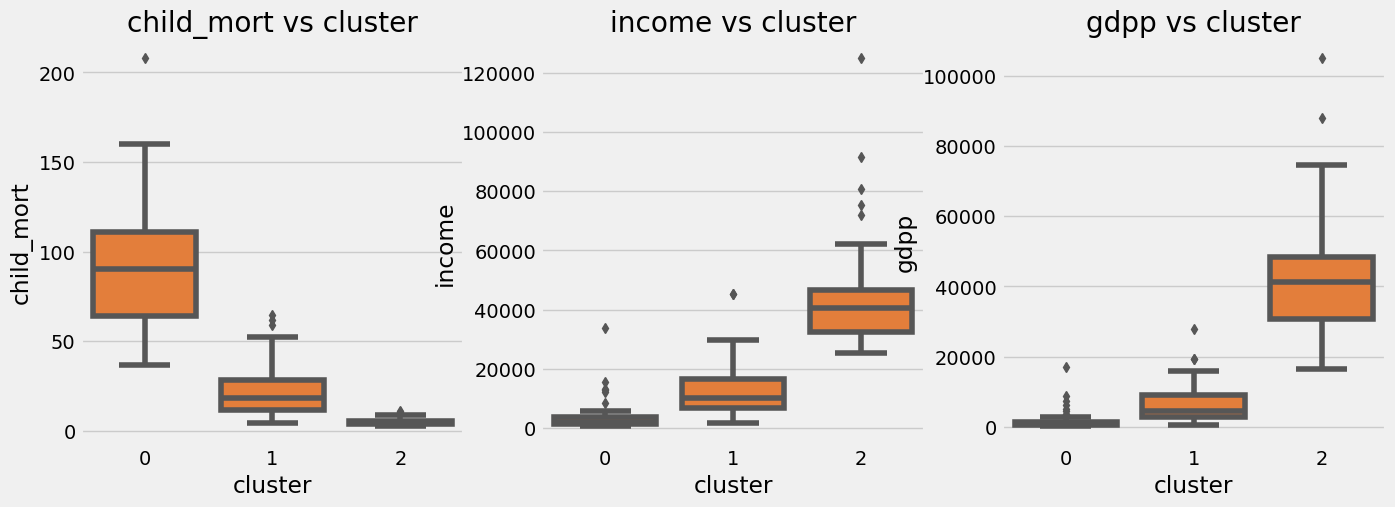

In [66]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data  = df_kmeans_3, color = '#FF781F');
plt.title('child_mort vs cluster')

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster', y = 'income', data  = df_kmeans_3, color = '#FF781F');
plt.title('income vs cluster')

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster', y = 'gdpp', data  = df_kmeans_3, color = '#FF781F');
plt.title('gdpp vs cluster')
plt.show()

In [67]:
 ########   From the above plot we can conclude :
    ######  0 : Help Needed
    ######  1 : Might Need Help
    ######  2 : No Help Needed

In [68]:
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 0] = 'Help Needed'
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 1] = 'Might Need Help'
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 2] = 'No Help Needed'

fig = px.choropleth(df_kmeans_3[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country',
                    color = df_kmeans_3['cluster'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        
                                        'Might Need Help':'Yellow',
                                         'No Help Needed':'Green'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [69]:
##################   Countries that need help    ###########################